In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9b130959bc72610375932f89a82d72fd


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | narsaq
Processing Record 3 of Set 1 | port hardy
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | muros
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | bilma
Processing Record 8 of Set 1 | deqing
Processing Record 9 of Set 1 | mazyr
Processing Record 10 of Set 1 | ouegoa
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | lata
Processing Record 15 of Set 1 | hamilton
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | xingyi
Processing Record 18 of Set 1 | rebrikha
Processing Record 19 of Set 1 | mayo
Processing Record 20 of Set 1 | ponta do sol
Processing Record 21 of Set 1 | sataua
City not found. Skipping...
Processing Record 22 of Set 1 | atuon

Processing Record 37 of Set 4 | dicabisagan
Processing Record 38 of Set 4 | los llanos de aridane
Processing Record 39 of Set 4 | half moon bay
Processing Record 40 of Set 4 | podor
Processing Record 41 of Set 4 | barao de melgaco
Processing Record 42 of Set 4 | karauzyak
City not found. Skipping...
Processing Record 43 of Set 4 | tessalit
Processing Record 44 of Set 4 | biak
Processing Record 45 of Set 4 | avarua
Processing Record 46 of Set 4 | san policarpo
Processing Record 47 of Set 4 | kavieng
Processing Record 48 of Set 4 | tallahassee
Processing Record 49 of Set 4 | huilong
Processing Record 50 of Set 4 | malwan
City not found. Skipping...
Processing Record 1 of Set 5 | san cristobal
Processing Record 2 of Set 5 | saleaula
City not found. Skipping...
Processing Record 3 of Set 5 | nhulunbuy
Processing Record 4 of Set 5 | kenscoff
Processing Record 5 of Set 5 | lucapa
Processing Record 6 of Set 5 | vestmanna
Processing Record 7 of Set 5 | vila
Processing Record 8 of Set 5 | kulhu

Processing Record 27 of Set 8 | shenxian
Processing Record 28 of Set 8 | seoul
Processing Record 29 of Set 8 | roma
Processing Record 30 of Set 8 | emerald
Processing Record 31 of Set 8 | astoria
Processing Record 32 of Set 8 | coihaique
Processing Record 33 of Set 8 | nanortalik
Processing Record 34 of Set 8 | lorengau
Processing Record 35 of Set 8 | ajuchitlan
Processing Record 36 of Set 8 | quatre cocos
Processing Record 37 of Set 8 | bogorodskoye
Processing Record 38 of Set 8 | black diamond
Processing Record 39 of Set 8 | srednekolymsk
Processing Record 40 of Set 8 | sokolka
Processing Record 41 of Set 8 | nome
Processing Record 42 of Set 8 | opuwo
Processing Record 43 of Set 8 | hakkari
Processing Record 44 of Set 8 | kirakira
Processing Record 45 of Set 8 | villanueva
Processing Record 46 of Set 8 | pacific grove
Processing Record 47 of Set 8 | santa isabel do rio negro
Processing Record 48 of Set 8 | berlevag
Processing Record 49 of Set 8 | baruun-urt
Processing Record 50 of Se

Processing Record 14 of Set 12 | diamantino
Processing Record 15 of Set 12 | labuhan
Processing Record 16 of Set 12 | levikha
Processing Record 17 of Set 12 | luanda
Processing Record 18 of Set 12 | sibolga
Processing Record 19 of Set 12 | rosarito
Processing Record 20 of Set 12 | mandan
Processing Record 21 of Set 12 | camopi
Processing Record 22 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 23 of Set 12 | abadan
Processing Record 24 of Set 12 | port-gentil
Processing Record 25 of Set 12 | panama city
Processing Record 26 of Set 12 | friesach
Processing Record 27 of Set 12 | turriff
Processing Record 28 of Set 12 | high level
Processing Record 29 of Set 12 | udachnyy
Processing Record 30 of Set 12 | hailar
Processing Record 31 of Set 12 | moose factory
Processing Record 32 of Set 12 | okha
Processing Record 33 of Set 12 | kandrian
Processing Record 34 of Set 12 | plettenberg bay
Processing Record 35 of Set 12 | bako
Processing Record 36 of Set 12 | doctor pedro p.

In [10]:
len(city_data)

564

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,35.60,74,20,16.11,AR,2020-07-11 19:22:41
1,Narsaq,60.92,-46.05,57.20,71,75,8.05,GL,2020-07-11 19:32:10
2,Port Hardy,50.70,-127.42,55.40,93,90,4.70,CA,2020-07-11 19:22:40
3,Muros,42.78,-9.06,79.00,59,0,17.00,ES,2020-07-11 19:23:32
4,Butaritari,3.07,172.79,83.61,77,96,13.06,KI,2020-07-11 19:22:39
5,Bilma,18.69,12.92,98.56,16,71,6.49,NE,2020-07-11 19:23:45
6,Deqing,30.54,119.96,80.01,88,100,1.45,CN,2020-07-11 19:32:11
7,Mazyr,52.05,29.25,67.17,94,100,4.74,BY,2020-07-11 19:32:11
8,Ouegoa,-20.35,164.43,67.21,80,0,12.21,NC,2020-07-11 19:32:11
9,Hilo,19.73,-155.09,78.80,61,90,6.46,US,2020-07-11 19:22:41


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-07-11 19:22:41,-54.80,-68.30,35.60,74,20,16.11
1,Narsaq,GL,2020-07-11 19:32:10,60.92,-46.05,57.20,71,75,8.05
2,Port Hardy,CA,2020-07-11 19:22:40,50.70,-127.42,55.40,93,90,4.70
3,Muros,ES,2020-07-11 19:23:32,42.78,-9.06,79.00,59,0,17.00
4,Butaritari,KI,2020-07-11 19:22:39,3.07,172.79,83.61,77,96,13.06


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1594496001.0185964

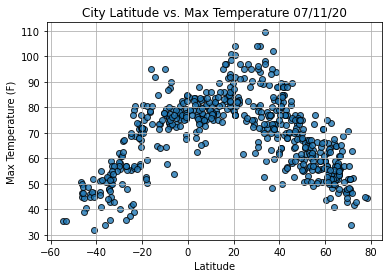

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

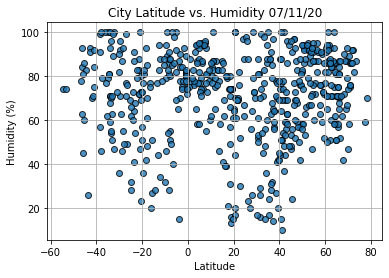

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

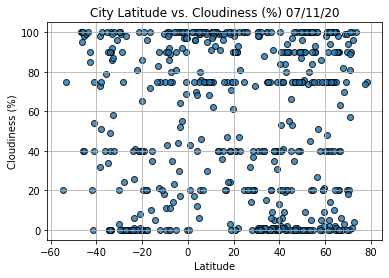

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

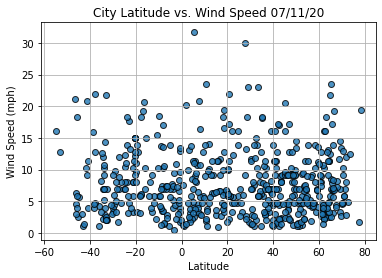

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                     Hamilton
Country                        US
Date          2020-07-11 19:22:59
Lat                         39.18
Lng                        -84.53
Max Temp                       88
Humidity                       42
Cloudiness                     40
Wind Speed                  16.11
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
559    False
560     True
561     True
562    False
563     True
Name: Lat, Length: 564, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Narsaq,GL,2020-07-11 19:32:10,60.92,-46.05,57.20,71,75,8.05
2,Port Hardy,CA,2020-07-11 19:22:40,50.70,-127.42,55.40,93,90,4.70
3,Muros,ES,2020-07-11 19:23:32,42.78,-9.06,79.00,59,0,17.00
4,Butaritari,KI,2020-07-11 19:22:39,3.07,172.79,83.61,77,96,13.06
5,Bilma,NE,2020-07-11 19:23:45,18.69,12.92,98.56,16,71,6.49
...,...,...,...,...,...,...,...,...,...
556,Thunder Bay,CA,2020-07-11 19:32:42,48.40,-89.32,75.20,50,75,12.75
557,Erzin,TR,2020-07-11 19:33:19,36.96,36.20,80.01,85,9,1.99
560,Yerbogachen,RU,2020-07-11 19:33:19,61.28,108.01,50.74,92,0,2.93
561,Normandin,CA,2020-07-11 19:33:20,48.83,-72.53,75.20,88,90,9.17


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

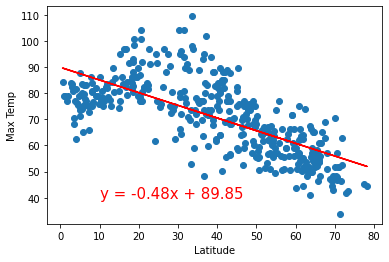

In [26]:

# Linear regression on the Northern Hemisphere
plot_linear_regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))

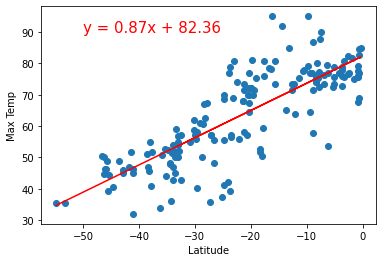

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-50,90))

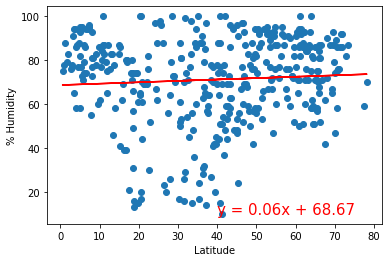

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

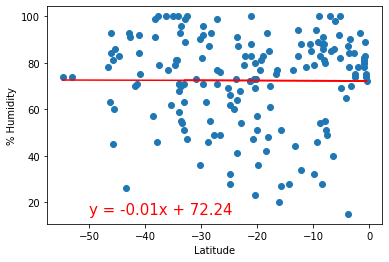

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

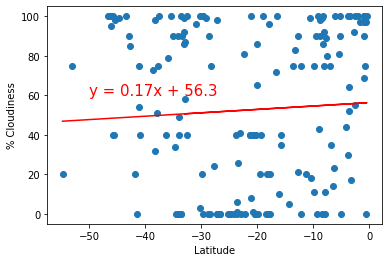

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-50,60))

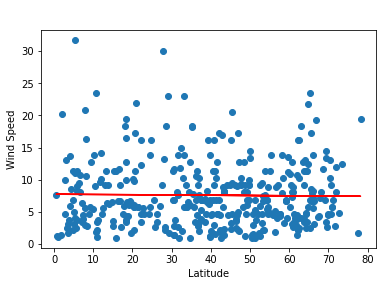

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

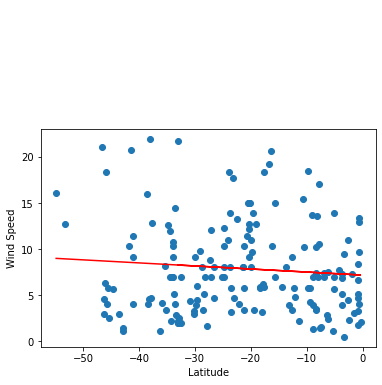

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))